# Analyze E+ data

## Import modules

In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load data and pre-process

In [147]:
path ="GreenBuiltHeatpumpV231Meter.csv"
# Load data and rename columns
df = pd.read_csv(path,usecols=['Date/Time', 'COOLING:ELECTRICITY_1 [J](TimeStep)'])
df.rename(columns={'Date/Time':'datetime','COOLING:ELECTRICITY_1 [J](TimeStep)':'Cooling'}, inplace=True)
# Convert datetime column to datetime format
df['datetime'] = pd.to_datetime(df['datetime'], format='%m/%d/%Y %H:%M')
df

,datetime,Cooling
0,2023-01-01 00:01:00,0.0
1,2023-01-01 00:02:00,0.0
2,2023-01-01 00:03:00,0.0
3,2023-01-01 00:04:00,0.0
4,2023-01-01 00:05:00,0.0
...,...,...
525595,2023-12-31 23:12:00,0.0
525596,2023-12-31 23:13:00,0.0
525597,2023-12-31 23:14:00,0.0
525598,2023-12-31 23:15:00,0.0


## Plot Heatmap of the data for day of the year and minute of the day

### Pivot data to get required format for heatmap

In [148]:
# Sort DataFrame by datetime
df.sort_values(by='datetime', inplace=True)

# Extract day of the year and minute of the day
df['day_of_year'] = df['datetime'].dt.dayofyear
df['minute_of_day'] = df['datetime'].dt.hour * 60 + df['datetime'].dt.minute


In [150]:
duplicate_rows = df[df.duplicated(subset=['day_of_year', 'minute_of_day'], keep=False)]
duplicate_rows.head(10)

,datetime,Cooling,day_of_year,minute_of_day
99,2023-01-01 01:40:00,0.00000,1,100
100,2023-01-01 01:40:00,0.00000,1,100
12099,2023-01-09 09:39:00,0.00000,9,579
12100,2023-01-09 09:39:00,0.00000,9,579
24099,2023-01-17 17:38:00,171537.75630,17,1058
24100,2023-01-17 17:38:00,99077.24883,17,1058
36099,2023-01-26 01:37:00,0.00000,26,97
36100,2023-01-26 01:37:00,0.00000,26,97
48099,2023-02-03 09:36:00,59604.35585,34,576
48100,2023-02-03 09:36:00,0.00000,34,576


In [151]:
# Remove duplicates (keeping the first occurrence)
df.drop_duplicates(subset=['day_of_year', 'minute_of_day'], keep='first', inplace=True)

# Pivot to get day_of_year x minute_of_day DataFrame
pivot_df = df.pivot(index='day_of_year', columns='minute_of_day', values='Cooling')

### Plot heatmap

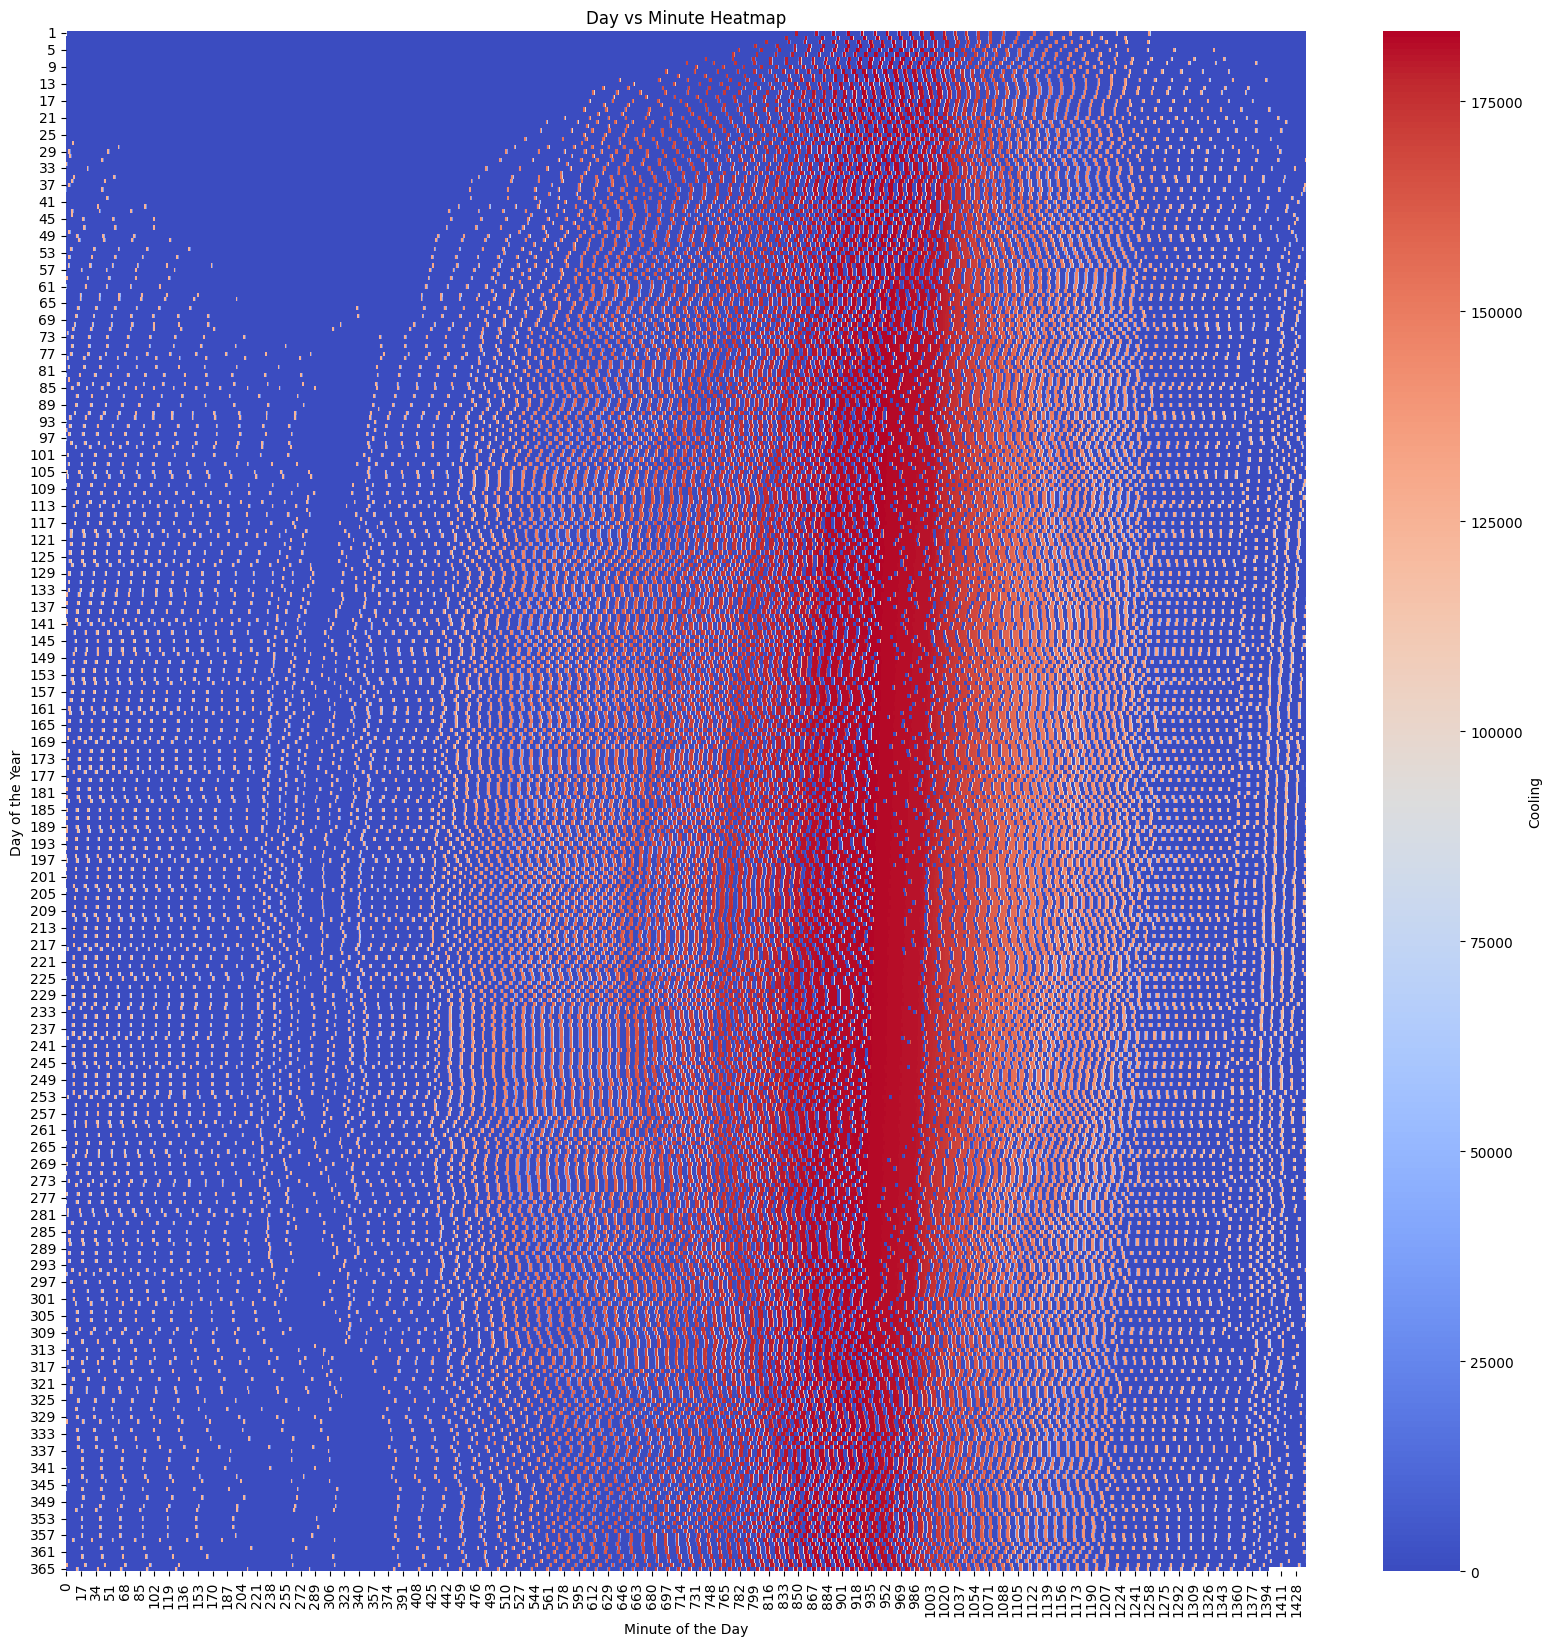

In [152]:
# Plot heatmap using Seaborn
plt.figure(figsize=(20, 20)) # width x height
sns.heatmap(pivot_df, cmap='coolwarm', cbar_kws={'label': 'Cooling'})
plt.title('Day vs Minute Heatmap')
plt.xlabel('Minute of the Day')
plt.ylabel('Day of the Year')
plt.show()